In [1]:
'''
author: Felix Hol
date: 2020 
content: code to reproduce Figure 2 and Figure 2 - Figure Supplement 1 of Hol et al biteOscope manuscript
'''

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
from pandas import DataFrame, Series
import pickle
import glob
import seaborn as sns

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

In [2]:
#### load dataframes

alb = pd.read_pickle('/Users/felix/Documents/mosquitoes/mosquitoData/biteData/dataUpload/albopictus.pkl')
aeg = pd.read_pickle('/Users/felix/Documents/mosquitoes/mosquitoData/biteData/dataUpload/aegypti.pkl')
ste = pd.read_pickle('/Users/felix/Documents/mosquitoes/mosquitoData/biteData/dataUpload/stephensi.pkl')
col = pd.read_pickle('/Users/felix/Documents/mosquitoes/mosquitoData/biteData/dataUpload/coluzzii.pkl')

In [3]:
dwellTime = [aeg.totTimeS, alb.totTimeS, ste.totTimeS, col.totTimeS]
logDwellTime = [np.log10(aeg.totTimeS), np.log10(alb.totTimeS), np.log10(ste.totTimeS), np.log10(col.totTimeS)]
totalDistance = [aeg.totDist, alb.totDist, ste.totDist, col.totDist] 
logTotalDistance = [np.log10(aeg.totDistMm), np.log10(alb.totDistMm), np.log10(ste.totDistMm), np.log10(col.totDistMm)]
timeToEngorge = [aeg.engorgementTimeS, alb.engorgementTimeS, ste.engorgementTimeS, col.engorgementTimeS]
mSpeed = [aeg.meanSpeedMmS, alb.meanSpeedMmS, ste.meanSpeedMmS, col.meanSpeedMmS] 

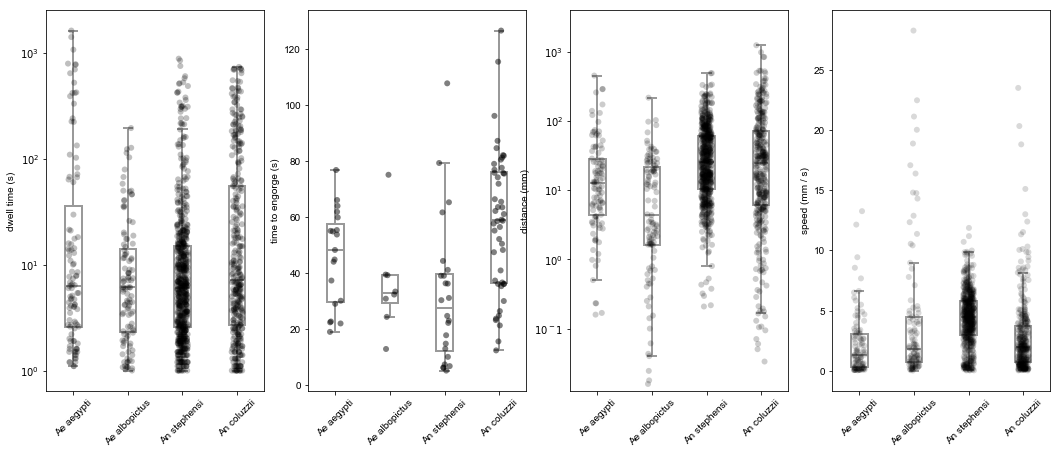

In [4]:
names = ['Ae aegypti', 'Ae albopictus', 'An stephensi', 'An coluzzii']

fig, axes = plt.subplots(1, 4, figsize=(18,7))

sns.boxplot(data=logDwellTime, fliersize=0, saturation=1, color='white', linewidth=2, width=0.3, ax=axes[0])
sns.stripplot(data=logDwellTime, color='k', size=6, alpha=0.25, ax=axes[0])
axes[0].set_xticklabels(names, rotation=45)
axes[0].set_ylabel('dwell time (s)')
ticks = np.arange(0, 3.5, 1)
axes[0].set_yticks(ticks)
axes[0].set_yticklabels(['$10^0$', '$10^1$', '$10^2$',  '$10^3$'])

sns.boxplot(data=timeToEngorge, fliersize=0, color='white', linewidth=2, width=0.3, ax=axes[1])
sns.stripplot(data=timeToEngorge, color='k', size=6, alpha=0.5, ax=axes[1])
axes[1].set_xticklabels(names, rotation=45)
axes[1].set_ylabel('time to engorge (s)')


sns.boxplot(data=logTotalDistance, fliersize=0, color='white', linewidth=2, width=0.3, ax=axes[2])
sns.stripplot(data=logTotalDistance, color='k', size=6, alpha=0.2, ax=axes[2])
axes[2].set_xticklabels(names, rotation=45)
axes[2].set_ylabel('distance (mm)')
ticks = np.arange(-1, 4, 1)
axes[2].set_yticks(ticks)
axes[2].set_yticklabels(['$10^-1$', '$10^0$', '$10^1$', '$10^2$',  '$10^3$',  '$10^4$'])
axes[2].set_ylim([-1.9, 3.6])

sns.boxplot(data=mSpeed, fliersize=0, color='white', linewidth=2, width=0.3, ax=axes[3])
sns.stripplot(data=mSpeed, color='k', size=6, alpha=0.15, ax=axes[3])
axes[3].set_xticklabels(names, rotation=45)
axes[3].set_ylabel('speed (mm / s)')

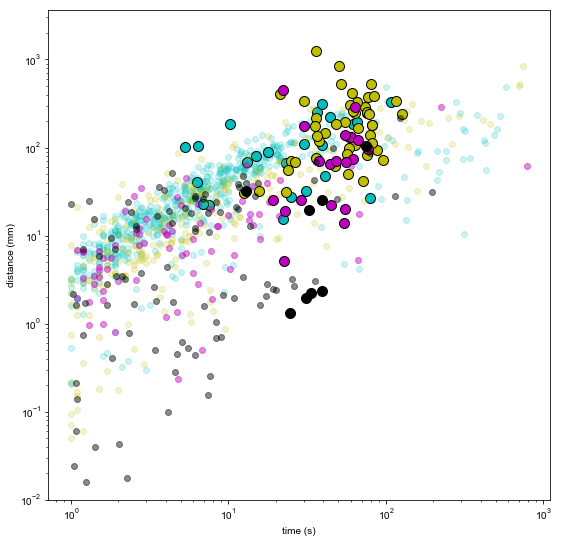

In [5]:
plt.figure(figsize=(9,9))

plt.loglog(ste.loc[ste['engorged'] == 0].totTimeS, ste.loc[ste['engorged'] == 0].totDistMm, '.c', marker='o', alpha=0.2)
plt.loglog(ste.loc[ste['engorged'] == 1].engorgementTimeS, ste.loc[ste['engorged'] == 1].totDistMm, '.c', marker='o', markersize=10, markeredgecolor='black')

plt.loglog(col.loc[col['engorged'] == 0].totTimeS, col.loc[col['engorged'] == 0].totDistMm, '.y', marker='o', alpha=0.2)
plt.loglog(col.loc[col['engorged'] == 1].engorgementTimeS, col.loc[col['engorged'] == 1].totDistMm, '.y', marker='o', markersize=10, markeredgecolor='black')

plt.loglog(aeg.loc[aeg['engorged'] == 0].totTimeS, aeg.loc[aeg['engorged'] == 0].totDistMm, '.m', marker='o', alpha=0.45)
plt.loglog(aeg.loc[aeg['engorged'] == 1].engorgementTimeS, aeg.loc[aeg['engorged'] == 1].totDistMm, '.m', marker='o', markersize=10, markeredgecolor='black')


plt.loglog(alb.loc[alb['engorged'] == 0].totTimeS, alb.loc[alb['engorged'] == 0].totDistMm, '.k', marker='o', alpha=0.45)
plt.loglog(alb.loc[alb['engorged'] == 1].engorgementTimeS, alb.loc[alb['engorged'] == 1].totDistMm, '.k', marker='o', markersize=10, markeredgecolor='black')

plt.ylim([0.01, 3600])

plt.xlabel('time (s)')
plt.ylabel('distance (mm)')